In [10]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from timeit import default_timer as timer

plt.rcParams["figure.dpi"] = 120

In [11]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]
times_my_implementation = []
times_numpy = []

t = np.linspace(0, 1, 10000)
semnal_compus = np.sin(2 * np.pi * 220 * t)
for dft_points in N:
    start = timer()
    X = np.zeros(dft_points, dtype=np.complex_)
    for omega in range(dft_points):
        for n in range(dft_points):
            X[omega] += semnal_compus[n] * np.exp(
                -2 * np.pi * 1j * omega * n / dft_points
            )
    end = timer()
    times_my_implementation.append(end - start)

    start = timer()
    X = np.fft.fft(semnal_compus, dft_points)
    end = timer()
    times_numpy.append(end - start)

[]

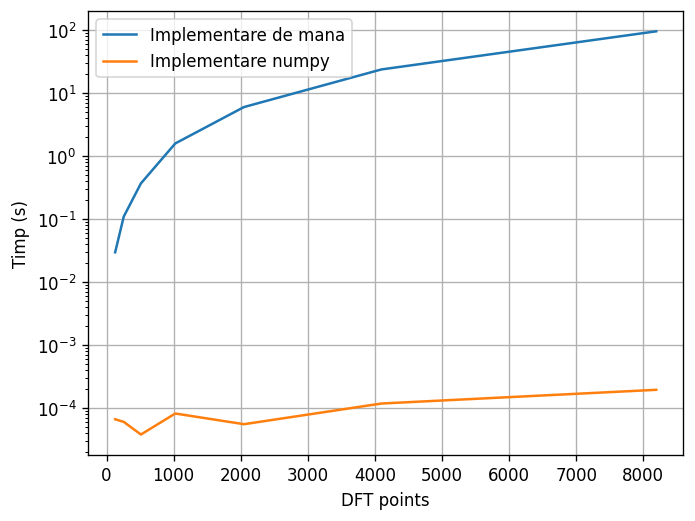

In [12]:
fig, ax = plt.subplots()
ax.plot(N, times_my_implementation, label="Implementare de mana")
ax.plot(N, times_numpy, label="Implementare numpy")
ax.set_xlabel("DFT points")
ax.set_ylabel("Timp (s)")
ax.legend()
ax.grid()
ax.set_yscale("log")

plt.plot()